In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("sleepy.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [11]:
df.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [7]:
# Drop rows with missing values for simplicity
df_clean = df.dropna().copy()

In [9]:
# Split Blood Pressure into Systolic and Diastolic
df_clean[['Systolic_BP', 'Diastolic_BP']] = df_clean['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(int)

# Set visualization style
sns.set(style="whitegrid")


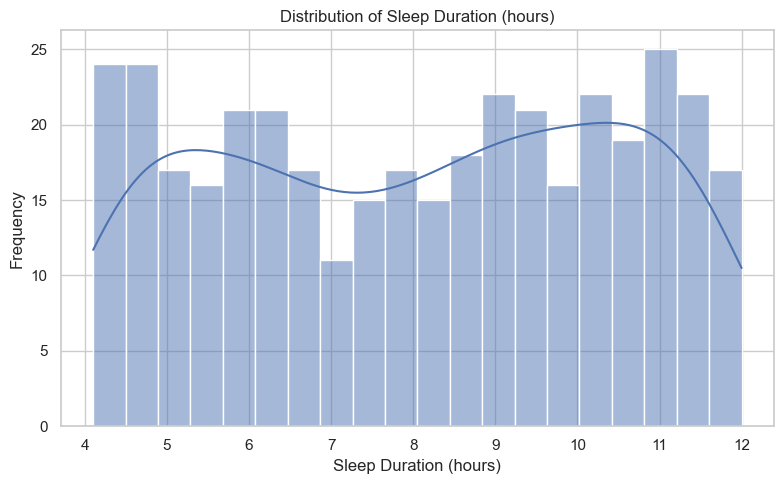

In [11]:
#  Distribution of Sleep Duration
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Sleep Duration (hours)'], kde=True, bins=20)
plt.title('Distribution of Sleep Duration (hours)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

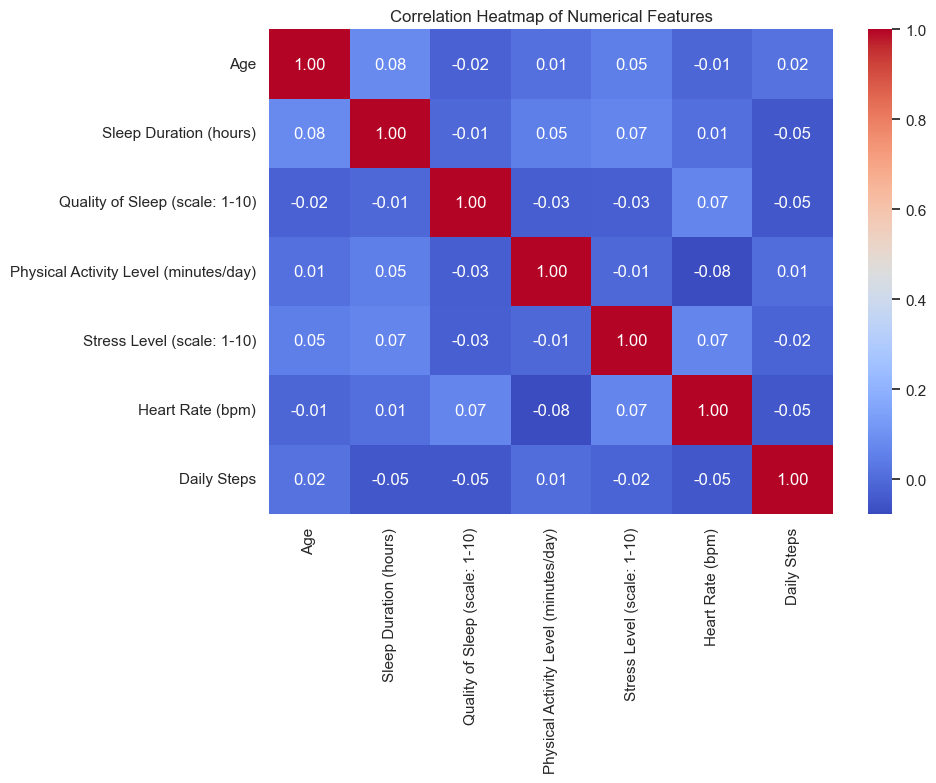

In [13]:
#  Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).drop(columns=['Person ID'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

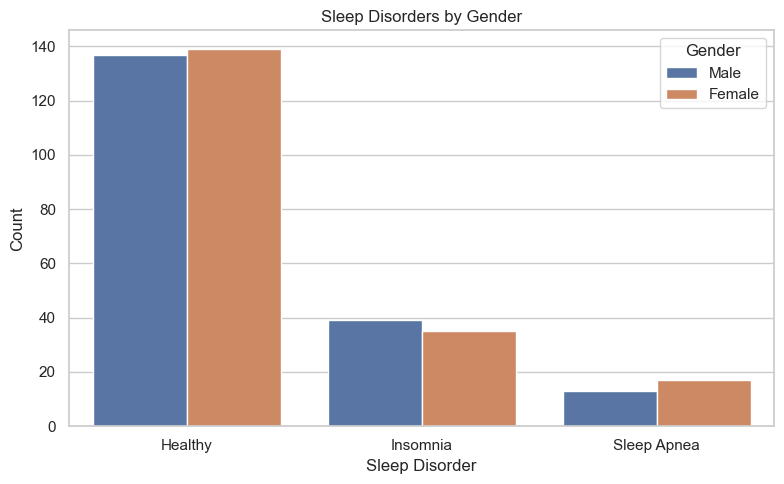

In [15]:
#  Sleep Disorders by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Sleep Disorder', hue='Gender')
plt.title('Sleep Disorders by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

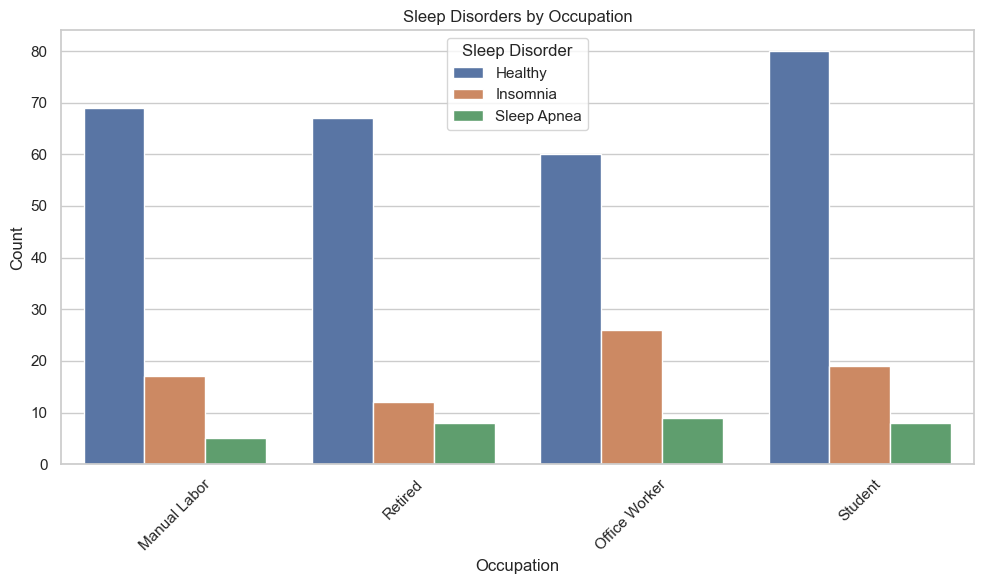

In [17]:
#  Sleep Disorders by Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Occupation', hue='Sleep Disorder')
plt.title('Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

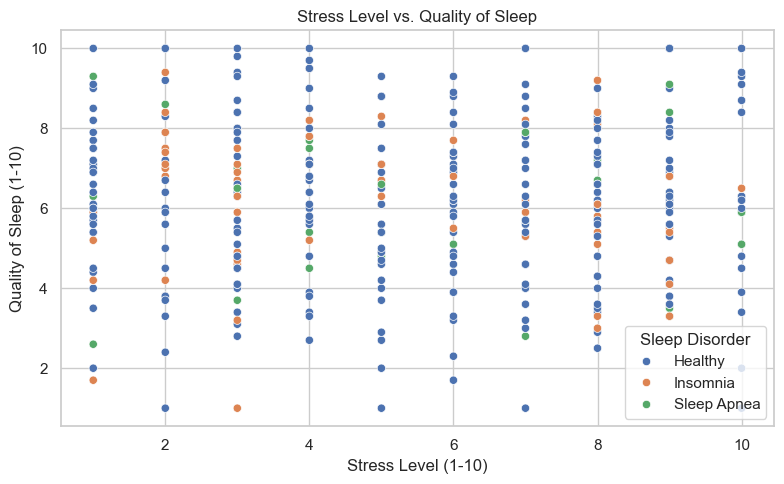

In [19]:
#  Stress Level vs. Quality of Sleep
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, 
                x='Stress Level (scale: 1-10)', 
                y='Quality of Sleep (scale: 1-10)', 
                hue='Sleep Disorder')
plt.title('Stress Level vs. Quality of Sleep')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Quality of Sleep (1-10)')
plt.tight_layout()
plt.show()

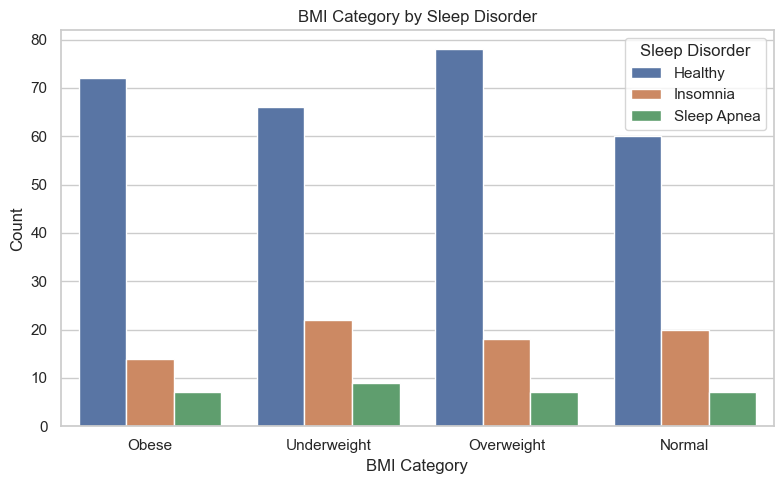

In [21]:
#  BMI Category by Sleep Disorder
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='BMI Category', hue='Sleep Disorder')
plt.title('BMI Category by Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()